# **Task 3: Customer Segmentation / Clustering**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
# Datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [3]:
# Preparation of data
transactions_customers = transactions.merge(customers, on='CustomerID') # Transactions got merged with customers using CustomerID column
customer_transaction_data = transactions_customers[['CustomerID', 'Region', 'TotalValue', 'Quantity']]
customer_transaction_summary = customer_transaction_data.groupby(['CustomerID', 'Region']).sum().reset_index()

In [5]:
# Encode region data (Converts categorical data to numerical data)
le = LabelEncoder()
customer_transaction_summary['RegionEncoded'] = le.fit_transform(customer_transaction_summary['Region'])

In [6]:
# Normalizing the data (Helps in preventing bias from large values)
normalized_data = customer_transaction_summary[['TotalValue', 'Quantity', 'RegionEncoded']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

In [7]:
# K-Means clustering (clustering algorithm that groups similar customers together.)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_transaction_summary['Cluster'] = kmeans.fit_predict(normalized_data) # Fits the model on the normalized transaction data and assigns each customer to a cluster.

In [8]:
# Davies-Bouldin Index (Metric of clustering quality)
db_index = davies_bouldin_score(normalized_data, customer_transaction_summary['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0347072581831223


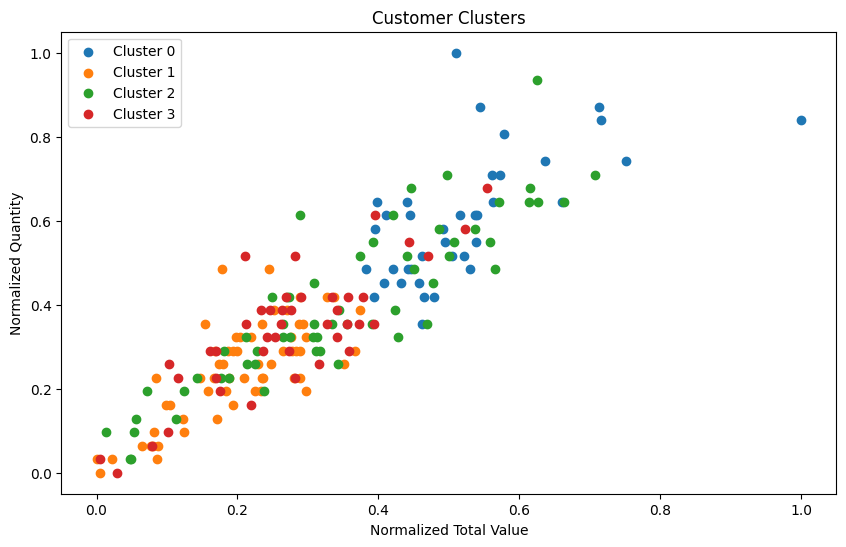

In [9]:
# Visualisation of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = normalized_data[customer_transaction_summary['Cluster'] == cluster]
    plt.scatter(cluster_data['TotalValue'], cluster_data['Quantity'], label=f'Cluster {cluster}')
plt.title('Customer Clusters')
plt.xlabel('Normalized Total Value')
plt.ylabel('Normalized Quantity')
plt.legend()
plt.show()

In [10]:
# Summary
clustering_summary = customer_transaction_summary.groupby('Cluster')[['TotalValue', 'Quantity']].mean()
clustering_summary['Count'] = customer_transaction_summary['Cluster'].value_counts()
clustering_summary.to_csv('Clustering_Summary.csv')